<a href="https://colab.research.google.com/github/szazs89/jupyter_ex/blob/master/mm_hw_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework example

Created by: Zsolt Szabó

This is an example document, which shows how to elaborate a homework in _Jupyter_ notebook.

## Introduction

The task is to indentify the parameters of a one-degree-of-freedom (1 D.o.F) damped oscillator, which moves on an inclined plane of angle $\alpha$. The oscillator consists of a mass $m$, a spring of stiffness $k$, a damper of parameter $c$. The spring and the damper connect the mass to the wall. The friction coefficient between the mass and the plane is  $\mu$.

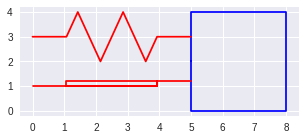

In [63]:
%matplotlib inline
import scipy as SP
import matplotlib.pyplot as PT
#ty = SP.transpose([ [i*.1, SP.sin(i*.1)] for i in range(201) ])
t = SP.transpose(range(201))*.1
y = SP.sin(t)
#PT.plot(t,y,'r.')
def MASS(p,w,h2):
  return SP.transpose(SP.transpose([p,p+[0,h2],p+[w,h2],p+[w,-h2],p+[0,-h2],p]))
def SPRG(p,w,h2):
  d = w/7
  return SP.transpose(SP.transpose(
      [p,p+[d*1.5,0],p+[2*d,h2],p+[3*d,-h2],p+[4*d,h2],
       p+[5*d,-h2],p+[5.5*d,0],p+[7*d,0]]))
def DMPR(p,w,h2):
  d = w/7
  return SP.transpose(SP.transpose(
      [p,p+[d*5.5,0],p+[5.5*d,h2],p+[1.5*d,h2],p+[1.5*d,0],
       p+[5.5*d,0],p+[5.5*d,h2],p+[7*d,h2]]))
mass = SP.matrix(MASS(SP.matrix([5,2]),3,2))
sprg = SP.matrix(SPRG(SP.matrix([0,3]),5,1))
dmpr = SP.matrix(DMPR(SP.matrix([0,1]),5,.2))
PT.figure(1,figsize=[5,2])
PT.plot(mass[:,0],mass[:,1],'b',sprg[:,0],sprg[:,1],'r',dmpr[:,0],dmpr[:,1],'r')

## Equation of motion

The equation of motion is according to Newton's 2nd Law:
$$m\ddot{x} = -kx -c\dot{x}-\mu N\mathop{\rm sgn}(\dot{x}),$$
where $N=mg\cos\alpha$ is the normal force acting on the mass from the inclined plane.

The normalized form of the equation of motion is:
$$\ddot{x}+2\zeta\omega_n\dot{x}+\omega_n^2 x=-\mu g\cos\alpha\mathop{\rm sgn}(\dot{x}),$$
where the natural angular frequency and the relative damping respectively are
$$ \omega_n=\sqrt{\frac{k}{m}},\quad \zeta=\frac{c}{2m\omega_n}. $$

Analytical solution can be obtained separating the cases w.r.t. the sign of the non-homogenous term (r.h.s.):
$$
x(t) = e^{-\beta t}(C_1\cos\gamma t+C_2\sin\gamma t)-\frac{\mu g\cos\alpha}{\omega_n^2}\begin{cases}
1, & \dot{x}>0\\
 -1, & \dot{x}<0 
\end{cases},
$$
where $\gamma=\omega_n\sqrt{1-\zeta^2}$ and $\beta=\zeta\omega_n$ are the damped angular frequency and the decay, respectively.

Using the initial condition $\;x(0)=x_0,\; \dot{x}(0)=0\;$ one has to solve the following equations in order to obtain the constants $C_1$ and $C_2$:
$$
\begin{eqnarray}
x_0 &=& C_1+\frac{\mu g}{\omega_n^2}\cos\alpha\\
0 &=& -\beta C_1+\gamma C_2
\end{eqnarray}\Rightarrow
$$
$$
\begin{eqnarray}
C_1 &=& x_0-\frac{\mu g}{\omega_n^2}\cos\alpha\\
C_2 &=& \frac{\beta x_0}{\gamma} - \frac{\beta}{\gamma\omega_n^2}\mu g\cos\alpha
\end{eqnarray}
$$

## Numerical simulation

For numerical simulation we use ODEINT from python's _scipy_ module. Let us rewrite the differential equation in Cauchy form:
$$\begin{eqnarray}
\dot{y_1} &=& y_2,\\
\dot{y_2} &=& -\omega_n^2 y_1-2\beta y_2 \mp \mu g\cos\alpha.
\end{eqnarray}$$

ODEINT cannot solve the non-smooth equation, therefore $\mu$ assumed to be zero. The following parameter values are used:
$$
\omega_n = 62.832\,\text{rad/s},\quad \zeta=0.1\quad\Rightarrow\quad
\gamma=\omega_n\sqrt{1-\zeta^2}=62.517\,\text{rad/s}.
$$

9.9498743710662


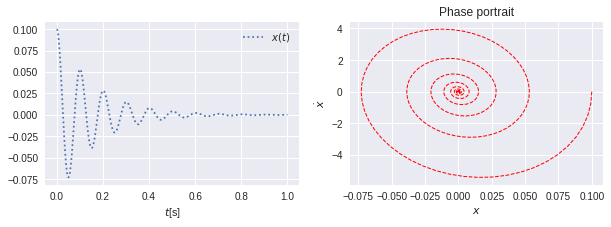

In [66]:
from scipy.integrate import odeint

def model(y,t):
  al = 20*SP.pi
  D2a, mug = 2*.1*al, .2*0
  dy0 = y[1]
  dy1 = -al**2*y[0] - D2a*y[1] - mug*SP.sign(y[1])
  return [dy0,dy1]

print(10*SP.sqrt(1-.01))
y0 = [.1,0]
n2, tmax = 250, 1
t = SP.linspace(0,tmax,2*n2+1)
y = odeint(model,y0,t)

PT.figure(1,figsize=[10,3])
PT.subplot(121)
PT.plot(t,y[:,0],':',label=r"$x(t)$")
PT.xlabel("$t$[s]")
PT.legend(loc="best")
PT.subplot(122)
PT.plot(y[:,0],y[:,1],'r--',linewidth=1)
PT.xlabel("$x$")
PT.ylabel("$\dot{x}$")
PT.title("Phase portrait")
PT.show()

## Fourier analysis

According the Shannon's Law the highest detectable frequency is the half of the sampling frequency:
$$\nu_{max}=\frac1{2\Delta t}.$$
The Fast Fourier Transform of $x(t)$ and its plot:

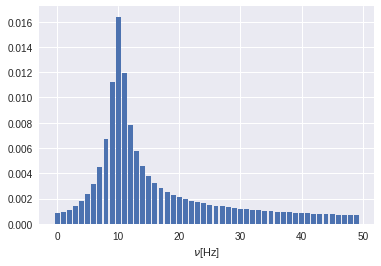

In [65]:
Y = SP.fft(y[:,0])
Y = abs(Y[:n2+1])/n2
f = SP.linspace(0,1/t[1]/2,n2+1)
PT.bar(f[:50],Y[:50])
PT.xlabel(r"$\nu$[Hz]")
PT.show()

## Conclusions

The simulations confirm the expected behaviour. (The known exponential solution function could also be plotted for reference.)
The effect of Coulomb friction could not be investigated via simulations because ODEINT cannot handle the assumed non-smooth differential equation.
The FFT plot shows the damped frequency around 10 Hz.